# Introduction:

**Germany**, a country known for its rich history and diverse culture, has undergone significant demographic changes over the years. In this project, we delve into the demographic trends of marriages, births, and deaths in Germany from <span style="background-color:yellow">1950 to 2022</span>. By analyzing various datasets publicly available from **German Federal Statistical Office**, we aim to gain insights into how these key aspects of population dynamics have evolved over time.

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/1200px-Flag_of_Germany.svg.png" alt="Germany Flag" width="500">



Our exploration begins with an examination of marriage statistics, uncovering trends in the number of marriages each year and exploring differences across different states in Germany. We then turn our attention to birth statistics, investigating patterns in the number of births and gender disparities in newborns. Finally, we explore death statistics, analyzing trends in mortality rates and gender disparities in life expectancy.

Through visualizations such as line charts, bar graphs, and pie charts, we aim to present a comprehensive overview of Germany's demographic landscape. By understanding these trends, we can gain valuable insights into the social and economic dynamics shaping the German population.




Dataset from : https://www-genesis.destatis.de/genesis/online/data?operation=sprachwechsel&language=en

# Importing Libraries & Datasets

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA  # used for time series analysis


# Marriages analysis

In [79]:
df_marriage= pd.read_csv('/Users/rising.volkan007/Downloads/Germany Data/Germany marriage stats.csv', delimiter=';')

In [80]:
df_marriage.head()

,Year,Marriages,Marriages per 1000 inhabitants
0,1950,750452,11.0
1,1951,718166,10.4
2,1952,659779,9.5
3,1953,620121,8.9
4,1954,605392,8.7


In [81]:
df_marriage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            73 non-null     int64  
 1   Marriages                       73 non-null     int64  
 2   Marriages per 1000 inhabitants  73 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


In [82]:
# Convert 'Year' to datetime index
df_marriage['Year'] = pd.to_datetime(df_marriage['Year'], format='%Y')
df_marriage.set_index('Year', inplace=True)

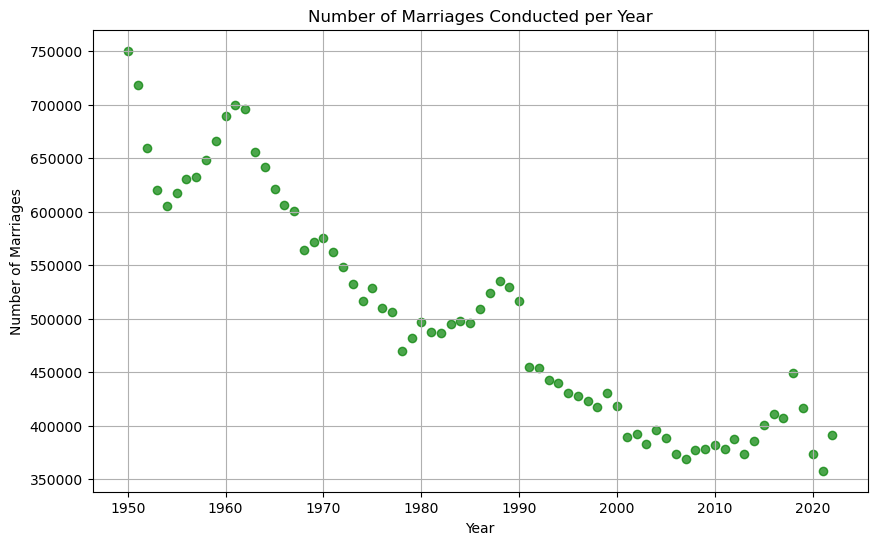

In [83]:
# Plot the number of marriages conducted per year
plt.figure(figsize=(10, 6))
plt.scatter(df_marriage.index, df_marriage['Marriages'], color='green', alpha=0.7)
plt.title('Number of Marriages Conducted per Year')
plt.xlabel('Year')
plt.ylabel('Number of Marriages')
plt.grid(True)
plt.show()


In this scatter plot we can observe that the number of marriages per year is decreasing significantly.

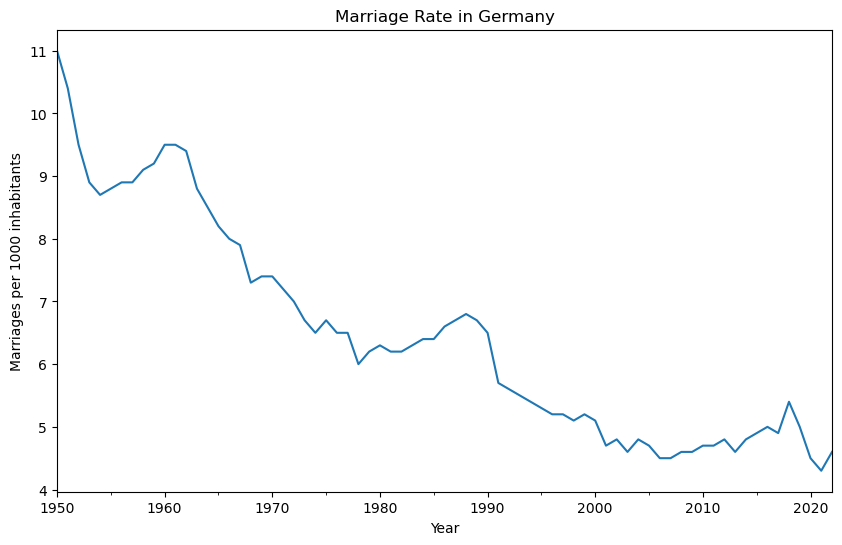

In [84]:
# Plot the time series
df_marriage['Marriages per 1000 inhabitants'].plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Marriages per 1000 inhabitants')
plt.title('Marriage Rate in Germany')
plt.show()

In the above chart we can also notice that per 1000 inhabitants the marriage percentage is also decreasing. Now it is a matter of concerning and look forward what reasons behind of people in Germany getting less marriages per year.

How do personal characteristics such as gender, education, or income affect the probability of certain life events occurring? A Leibniz Institute for Financial Research SAFE study examined these likelihoods using German Socio-Economic Panel (SOEP) data. The two authors’ study, Raimond Maurer and Sehrish Usman, shows that education and income significantly influence the likelihood of getting married, having children, and average life expectancy [1].

In Germany, marriage rates have declined significantly since 1991, with only 51.0% of adults married in 2019 compared to 60.2% in 1991. However, there are indications of stabilization, particularly among families with children, as the proportion of births within wedlock increased from a low of 64.5% in 2016 to 66.9% in 2020. Additionally, there has been a recent uptick in the number of marriages [2]. 

source_1: https://safe-frankfurt.de/news-latest/all-news/news-view/education-and-income-have-different-effects-on-the-life-cycle-in-germany.html

source_2: https://www.iwkoeln.de/en/studies/wido-geis-thoene-negativtrend-gestoppt-entwicklungen-bei-verheirateten-und-einstellungen-zur-ehe-515380.html


In [85]:
# Fit ARIMA model
model = ARIMA(df_marriage['Marriages per 1000 inhabitants'], order=(5,1,0)) # Example order, you might need to tune this
model_fit = model.fit()

/Users/rising.volkan007/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rising.volkan007/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rising.volkan007/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [86]:
# Forecast
forecast = model_fit.forecast(steps=5) # Adjust steps for how many periods ahead you want to forecast
print(forecast)

2023-01-01    4.680414
2024-01-01    4.727601
2025-01-01    4.712037
2026-01-01    4.737568
2027-01-01    4.742740
Freq: AS-JAN, Name: predicted_mean, dtype: float64


<img src="https://www.iamexpat.de/sites/iamexpat.de/files/styles/ogimage_thumb/public/marriage-partnerships-germany.jpg?itok=SfXwNuW-" alt="Germany Marriages" width="500">


# Marriages in States

In [11]:
df_marriage_states= pd.read_csv('/Users/rising.volkan007/Downloads/Germany Data/German marriages stats in states.csv', delimiter=';')

In [12]:
df_marriage_states.head()

,German States,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Baden-Württemberg,61448,59373,60724,59885,59591,58198,57898,57094,55693,...,48426,50751,52627,54556,54591,58417,54613,50533,48883,52375
1,Bayern,74387,72651,72247,70475,69401,67075,66767,65419,64065,...,59623,62327,65128,66324,66790,72798,68501,61138,59670,65057
2,Berlin,21850,18130,17895,17111,17269,16383,15813,15399,14526,...,12963,13373,13759,13748,12686,15660,14602,12288,12163,12341
3,Brandenburg,16814,8328,7901,7901,8502,8775,8756,8709,9266,...,12245,12812,13314,13817,14156,15440,14203,12809,11818,13178
4,Bremen,4338,4264,4005,3969,3859,3561,3509,3553,3477,...,2619,2800,2708,2677,2744,3360,3117,2765,2439,2642


In [13]:
df_marriage_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   German States  16 non-null     object
 1   1990           16 non-null     int64 
 2   1991           16 non-null     int64 
 3   1992           16 non-null     int64 
 4   1993           16 non-null     int64 
 5   1994           16 non-null     int64 
 6   1995           16 non-null     int64 
 7   1996           16 non-null     int64 
 8   1997           16 non-null     int64 
 9   1998           16 non-null     int64 
 10  1999           16 non-null     int64 
 11  2000           16 non-null     int64 
 12  2001           16 non-null     int64 
 13  2002           16 non-null     int64 
 14  2003           16 non-null     int64 
 15  2004           16 non-null     int64 
 16  2005           16 non-null     int64 
 17  2006           16 non-null     int64 
 18  2007           16 non-null     i

In [14]:
# Set 'German States' column as index for easier analysis
df_marriage_states.set_index('German States', inplace=True)

# Calculate summary statistics for each state
summary_stats = df_marriage_states.describe()

# Display summary statistics
print(summary_stats)


               1990           1991           1992           1993  \
count      16.00000      16.000000      16.000000      16.000000   
mean    32274.25000   28393.187500   28339.250000   27662.812500   
std     29478.15969   30323.486511   30449.400455   29366.317797   
min      4338.00000    4264.000000    4005.000000    3969.000000   
25%     14973.25000    8304.750000    7866.500000    7941.500000   
50%     20190.00000   16430.500000   15650.000000   15459.500000   
75%     39741.00000   38854.750000   39649.750000   38364.250000   
max    114422.00000  111286.000000  110904.000000  106315.000000   

                1994          1995          1996          1997          1998  \
count      16.000000      16.00000     16.000000     16.000000     16.000000   
mean    27515.250000   26908.37500  26706.062500  26423.500000  26088.750000   
std     28726.688134   27737.57521  27551.372349  27380.032364  26714.800658   
min      3859.000000    3561.00000   3509.000000   3553.000000   34

In [15]:
# Calculate the overall trend (mean) of marriages conducted in each state over the years
mean_trend = df_marriage_states.mean(axis=1)

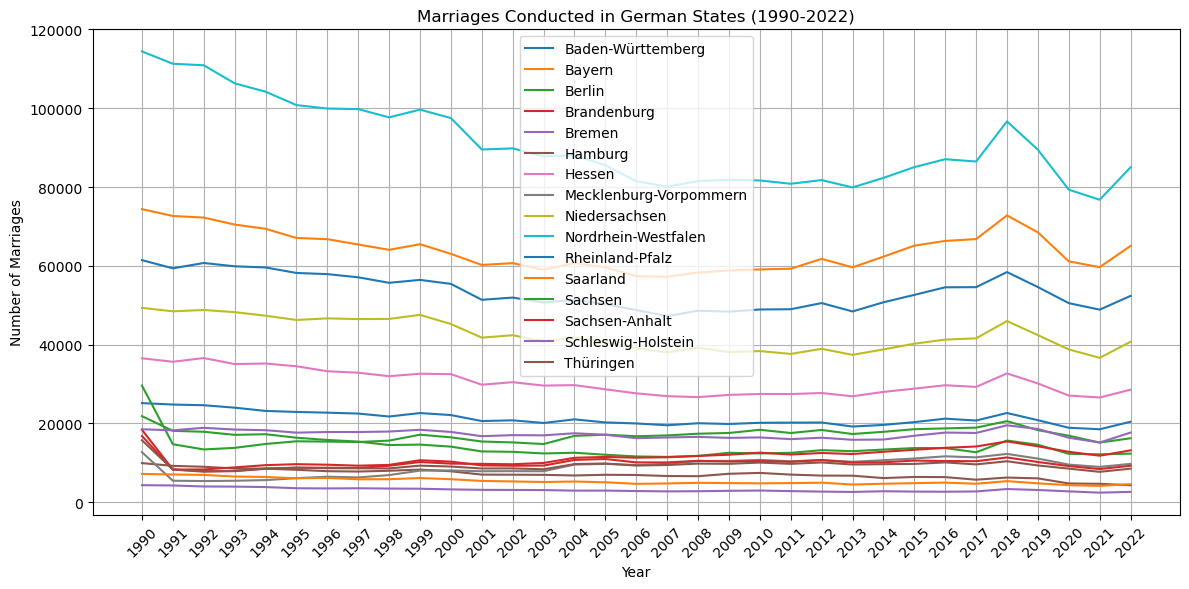

In [16]:
# Plot the trend for each state over the years
plt.figure(figsize=(12, 6))
for state in df_marriage_states.index:
    plt.plot(df_marriage_states.columns, df_marriage_states.loc[state], label=state)

plt.title('Marriages Conducted in German States (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Marriages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the chart above we can observe that Nordrhein-Westfalen state holds highest number of marriages conducted. since it is the <span style="background-color:yellow">largest state</span> in Germany and many people reside in this state. Below chart we can observe in details marriages conducted in this state

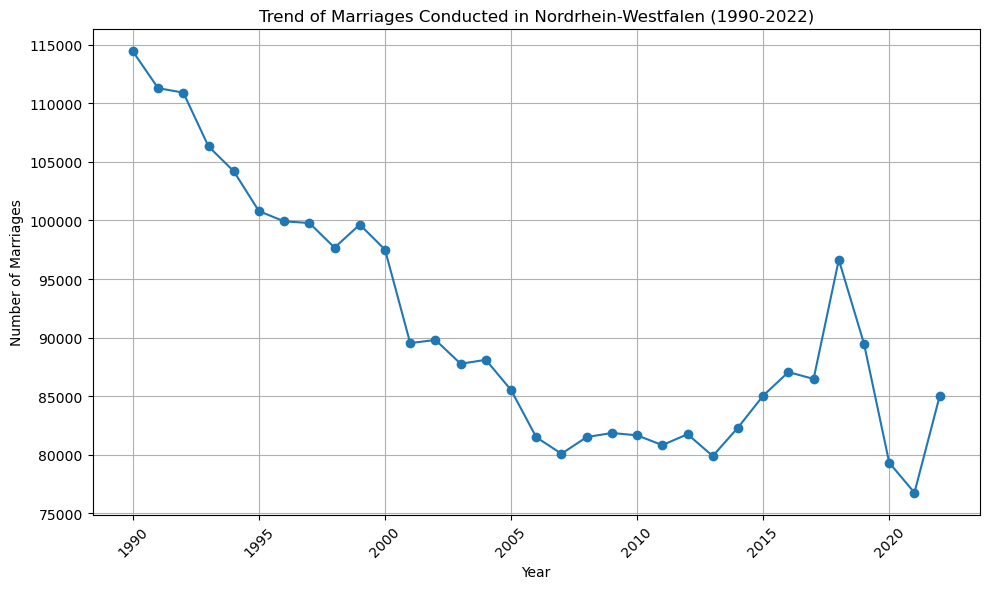

In [17]:
# Filter the row corresponding to Nordrhein-Westfalen
df_nrw = df_marriage_states.loc['Nordrhein-Westfalen']

# Plot the trend of marriages in Nordrhein-Westfalen
df_nrw.plot(marker='o', figsize=(10, 6))
plt.title('Trend of Marriages Conducted in Nordrhein-Westfalen (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Marriages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

One thing to be noticed here in the 90's era people used to get marriages more rather than this decades.

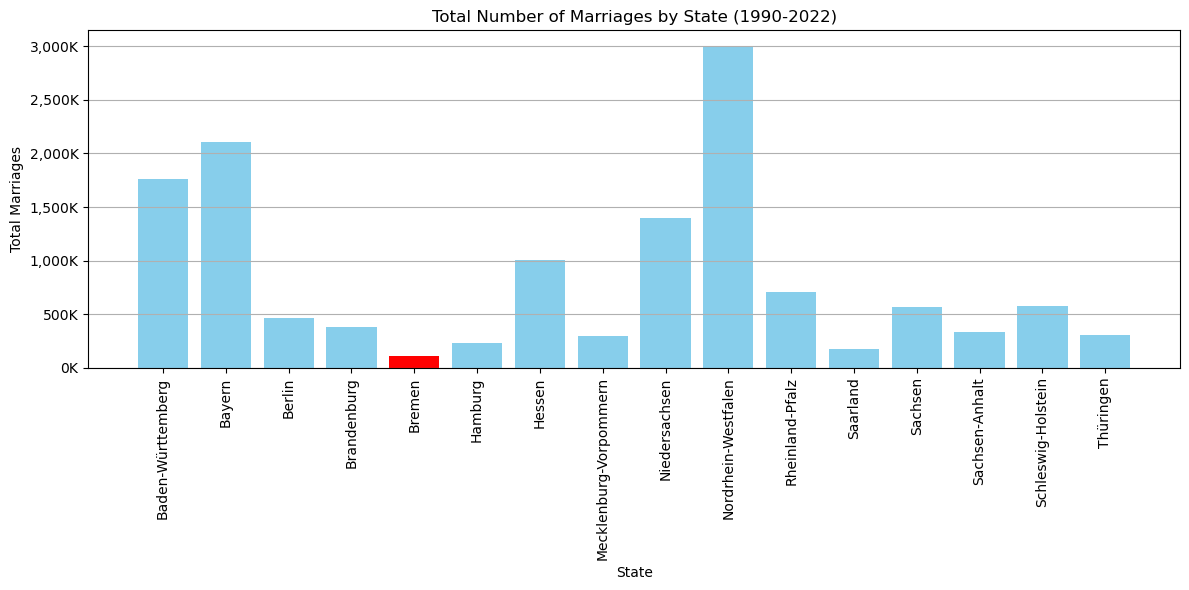

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate the total number of marriages for each state
df_marriage_states['Total Marriages'] = df_marriage_states.sum(axis=1)

# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return '{:,.0f}K'.format(x/1000)

# Plot the total number of marriages for each state
plt.figure(figsize=(12, 6))
plt.bar(df_marriage_states.index, df_marriage_states['Total Marriages'], color='skyblue')
plt.title('Total Number of Marriages by State (1990-2022)')
plt.xlabel('State')
plt.ylabel('Total Marriages')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Format y-axis labels in thousands
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Highlight the state with the lowest trend
min_trend_state = df_marriage_states[df_marriage_states['Total Marriages'] == df_marriage_states['Total Marriages'].min()]
plt.bar(min_trend_state.index, min_trend_state['Total Marriages'], color='red')

plt.tight_layout()
plt.show()


In the above bar chart shows the <span style="background-color:yellow">Bremen state</span> the number of marriages are the **lowest**. it is also the smallest states in Germany this could be a probable reason and there might be less people residing there as it is small state.

In [19]:
# Calculate the total number of marriages for each state
df_marriage_states['Total Marriages'] = df_marriage_states.sum(axis=1)

# Find the state with the lowest total number of marriages
state_with_lowest_trend = df_marriage_states[df_marriage_states['Total Marriages'] == df_marriage_states['Total Marriages'].min()]

print("State(s) with the lowest trend:")
print(state_with_lowest_trend)


State(s) with the lowest trend:
               1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
German States                                                               
Bremen         4338  4264  4005  3969  3859  3561  3509  3553  3477  3438   

               ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
German States  ...                                                         
Bremen         ...  2800  2708  2677  2744  3360  3117  2765  2439  2642   

               Total Marriages  
German States                   
Bremen                  208484  

[1 rows x 34 columns]


above output data shows the details of the marriage trends of the state.

# Husband Wife Age in marriages

In [51]:
df_marriage_age= pd.read_csv('/Users/rising.volkan007/Downloads/Germany Data/Husband Wife Age.csv', delimiter=';')

In [54]:
df_marriage_age.head(15)

,Age of the husband,Age of the wife,Age of the wife.1,Age of the wife.2,Age of the wife.3,Age of the wife.4,Age of the wife.5,Age of the wife.6,Age of the wife.7,Age of the wife.8,Age of the wife.9,Age of the wife.10,Age of the wife.11,Age of the wife.12,Age of the wife.13
0,NaN,under 15 years,15 to under 20 years,20 to under 25 years,25 to under 30 years,30 to under 35 years,35 to under 40 years,40 to under 45 years,45 to under 50 years,50 to under 55 years,55 to under 60 years,60 to under 65 years,65 to under 70 years,70 to under 75 years,75 years and over
1,under 15 years,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,15 to under 20 years,-,254,192,37,9,5,2,2,-,-,-,-,-,-
3,20 to under 25 years,-,1754,11616,3627,664,191,59,36,17,8,3,1,1,-
4,25 to under 30 years,-,808,19666,54419,11133,1864,357,161,68,19,10,1,1,-
5,30 to under 35 years,-,168,5425,43396,44918,7742,1225,323,138,34,11,3,2,3
6,35 to under 40 years,-,46,1246,11206,26532,18314,3319,889,269,66,18,2,2,-
7,40 to under 45 years,-,15,368,2568,7457,11392,6995,2287,763,181,41,6,1,-
8,45 to under 50 years,-,10,174,964,2850,5736,6991,8005,3651,878,165,36,12,6
9,50 to under 55 years,-,4,84,438,1130,2249,3763,8550,9560,2950,646,123,22,11


This above dataframe represents the data from 2017 published data in Database of the
Federal Statistical Office of Germany.

This dataframe provides a breakdown of marriages by the age groups of husbands and wives in Germany. Interestingly, the majority of marriages occur between individuals aged 25 to under 40 years, with the highest frequency observed in the **25 to under 30 years** age group for both husbands and wives. There's a noticeable decline in the number of marriages as the age of both spouses increases beyond 40 years. Additionally, the dataset reveals a relatively low number of marriages involving individuals under 20 years old.

# Birth Statistics

In [56]:
df_birth= pd.read_csv('/Users/rising.volkan007/Downloads/Germany Data/Birth Stats.csv', delimiter=';')

In [57]:
df_birth.head()

,Year,Male,Female,Total
0,1950,578191,538510,1116701
1,1951,571699,534681,1106380
2,1952,571152,533932,1105084
3,1953,564929,530100,1095029
4,1954,572559,537184,1109743


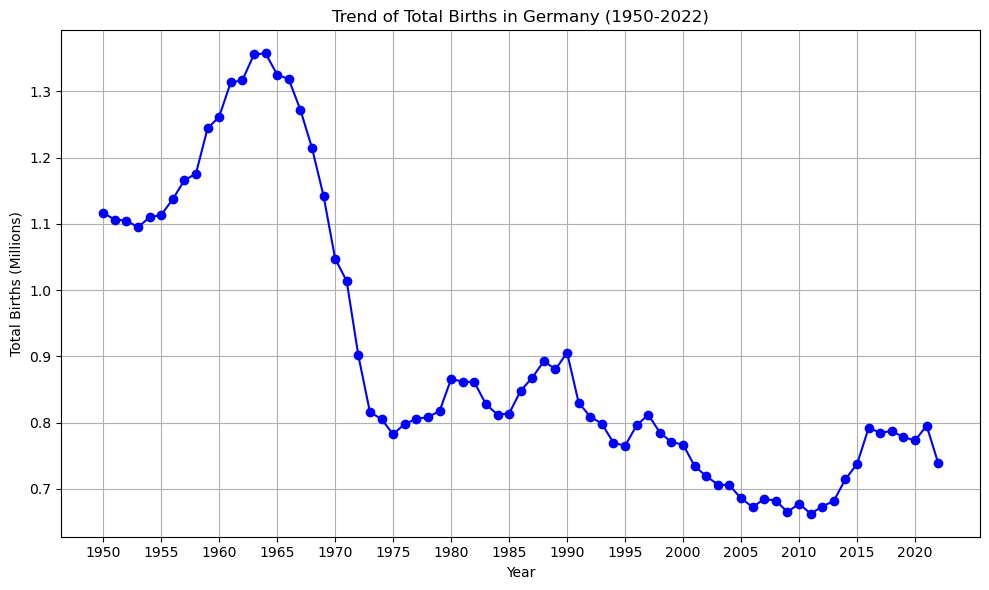

In [62]:
import matplotlib.pyplot as plt

# Divide total births by 1 million
total_births_millions = df_birth['Total'] / 1e6

# Plotting the trend of total births
plt.figure(figsize=(10, 6))
plt.plot(df_birth['Year'], total_births_millions, marker='o', color='b', linestyle='-')
plt.title('Trend of Total Births in Germany (1950-2022)')
plt.xlabel('Year')
plt.ylabel('Total Births (Millions)')
plt.grid(True)
plt.xticks(range(1950, 2023, 5))  # Adjust x-axis ticks for better readability

plt.tight_layout()
plt.show()


The chart shows the trend of total births in Germany from **1950 to 2022**. The y-axis shows the total number of births in millions, while the x-axis shows the years.

The chart shows that there was a baby boom in Germany after World War II, with the number of births peaking at around **1.3 million in the mid-1960s**. The birth rate then declined steadily over the next few decades, reaching a low of around **700,000 in the early 2000s**. Since then, the birth rate has recovered somewhat, but it is still well below the levels seen in the **1950s and 1960s**.

There are a number of factors that have contributed to the decline in Germany's birth rate, including economic uncertainty, the increasing cost of raising children, and the changing role of women in society.

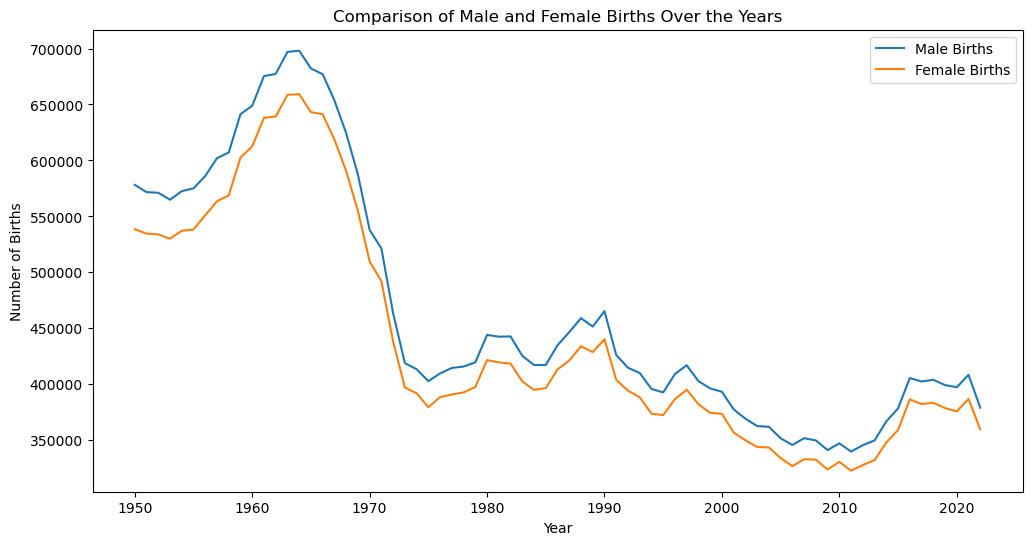

In [63]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_birth['Year'], df_birth['Male'], label='Male Births')
plt.plot(df_birth['Year'], df_birth['Female'], label='Female Births')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Comparison of Male and Female Births Over the Years')
plt.legend()

# Show plot
plt.show()

The chart is titled "Comparison of Male and Female Births Over the Years". It shows the number of male and female births over a period that is not specified on the chart. The y-axis shows the number of births, and the x-axis shows the years. From the information provided in the chart, it is impossible to say exactly how many births are represented or the exact time period covered.

Here are some observations about the chart:

- The number of births appears to fluctuate somewhat over time.
- There seems to be a generally higher number of male births than female births.
- The gap between the number of male and female births appears to be widening over time.

It is important to note that this chart does not show sex ratios at birth, which is the number of male births for every 100 female births. According to Our World in Data: https://ourworldindata.org/gender-ratio, naturally occurring sex ratios at birth are around 105 males per 100 females.

# Death Statistics

In [64]:
df_death= pd.read_csv('/Users/rising.volkan007/Downloads/Germany Data/Death Stats.csv', delimiter=';')

In [65]:
df_death.head()

,Year,Male,Female,Total
0,1950,375323,373006,748329
1,1951,380155,372542,752697
2,1952,387003,380636,767639
3,1953,400373,390281,790654
4,1954,392610,382681,775291


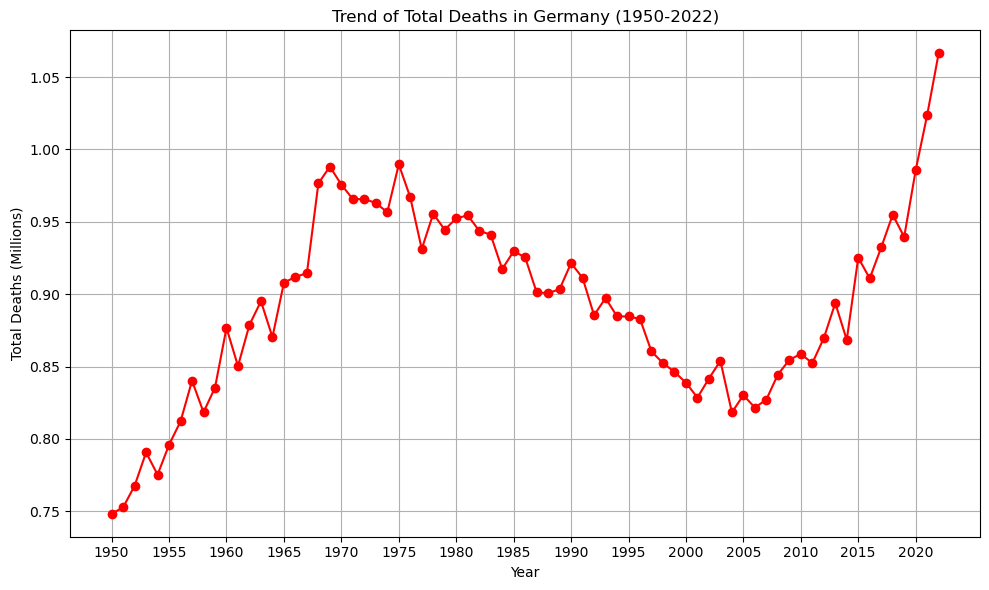

In [69]:
# Divide total deaths by 1 million
total_deaths_millions = df_death['Total'] / 1e6

# Plotting the trend of total deaths
plt.figure(figsize=(10, 6))
plt.plot(df_death['Year'], total_deaths_millions, marker='o', color='r', linestyle='-')
plt.title('Trend of Total Deaths in Germany (1950-2022)')
plt.xlabel('Year')
plt.ylabel('Total Deaths (Millions)')
plt.grid(True)
plt.xticks(range(1950, 2023, 5))  # Adjust x-axis ticks for better readability

plt.tight_layout()
plt.show()

The chart shows the trend of total deaths in Germany from 1950 to 2022. The y-axis shows the total number of deaths in millions, while the x-axis shows the years.

There are two main things to note about the trend:

- Overall, the number of deaths in Germany has increased over time. There are a few exceptions, such as a decrease between 1975 and 2004.
- The rate of increase has slowed in recent years.

There are a number of reasons why the number of deaths in Germany has increased over time. One reason is that the population of Germany is aging. As people get older, they are more likely to die. Another reason is that medical advances have led to people living longer with chronic conditions, which can eventually lead to death. And also people died more in the Covid-19 time period from 2019-2022.

The fact that the rate of increase has slowed in recent years may be due to a number of factors, including improvements in public health and medical care.

Here are some additional resources that you may find helpful:

Population, mortality and place of death in Germany (1950-2050) - implications for end-of-life care in the future: https://pubmed.ncbi.nlm.nih.gov/23041107/

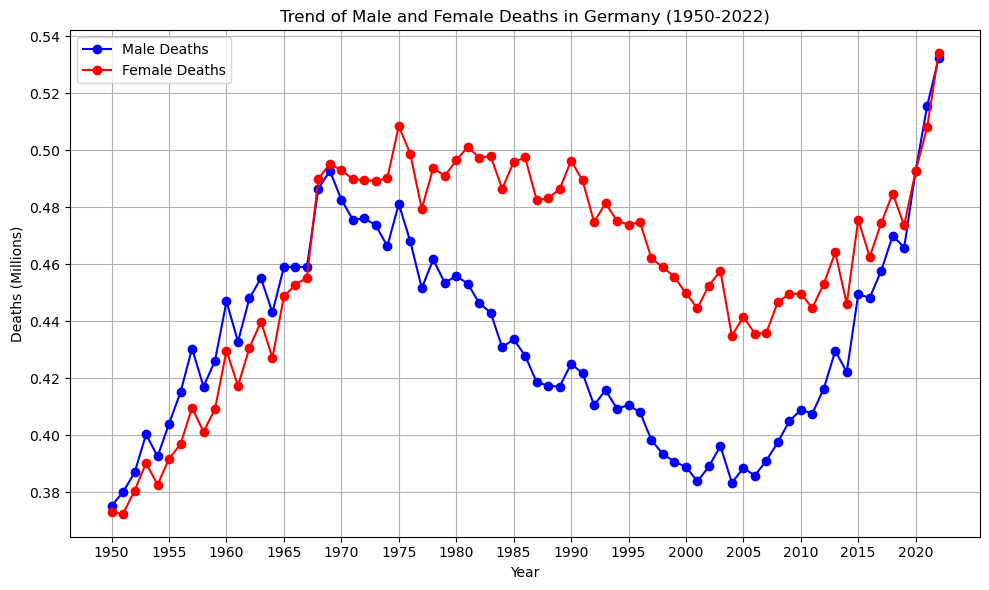

In [70]:
# Plotting the trend of male and female deaths
plt.figure(figsize=(10, 6))
plt.plot(df_death['Year'], df_death['Male'] / 1e6, marker='o', color='b', linestyle='-', label='Male Deaths')
plt.plot(df_death['Year'], df_death['Female'] / 1e6, marker='o', color='r', linestyle='-', label='Female Deaths')
plt.title('Trend of Male and Female Deaths in Germany (1950-2022)')
plt.xlabel('Year')
plt.ylabel('Deaths (Millions)')
plt.grid(True)
plt.xticks(range(1950, 2023, 5))  # Adjust x-axis ticks for better readability
plt.legend()

plt.tight_layout()
plt.show()

Based on the details the chart depicting trends in male and female deaths in Germany between 1950 and 2022, here's a revised analysis of the observations:

- Generally, male death rates appear consistently higher than female death rates throughout the timeframe, with a possible exception in the mid-1970s where female deaths might have been higher.
- There appears to be a downward trend in death rates for both genders, barring the potential anomaly in the 1970s.
- The disparity between male and female death rates may be shrinking, with female death rates potentially approaching or surpassing male death rates in recent years.

Important Considerations:

- To validate these observations and acquire a more comprehensive understanding of mortality trends in Germany, consulting reliable sources like official German health statistics or reputable publications is essential.

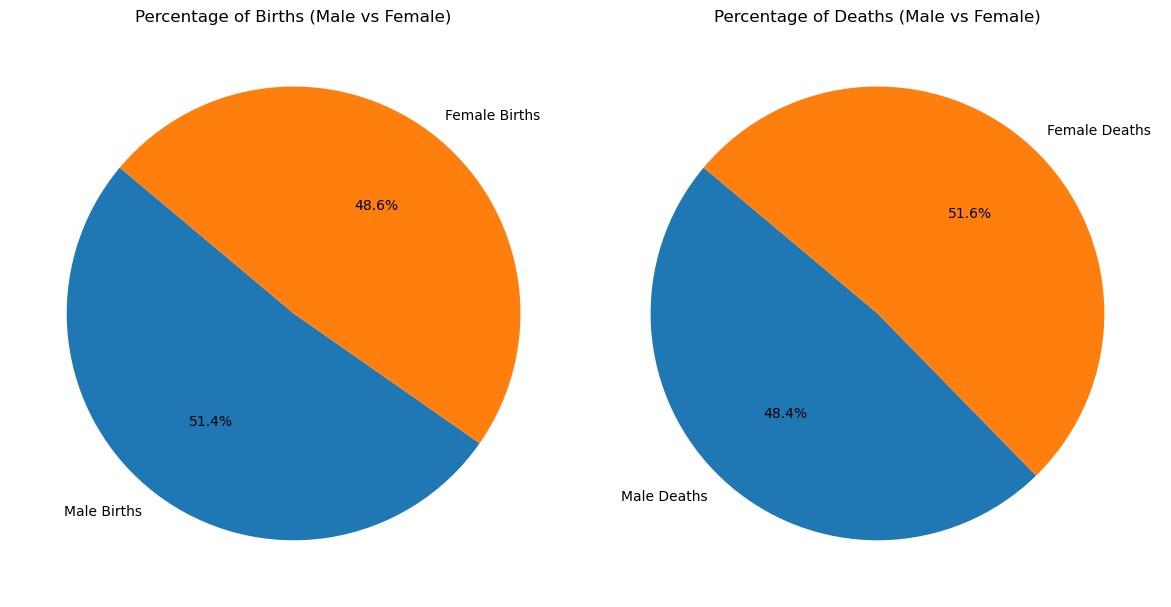

In [71]:
import matplotlib.pyplot as plt

# Calculate total births and deaths for males and females
total_births_male = df_birth['Male'].sum()
total_births_female = df_birth['Female'].sum()
total_deaths_male = df_death['Male'].sum()
total_deaths_female = df_death['Female'].sum()

# Data for pie chart of births
births_labels = ['Male Births', 'Female Births']
births_sizes = [total_births_male, total_births_female]

# Data for pie chart of deaths
deaths_labels = ['Male Deaths', 'Female Deaths']
deaths_sizes = [total_deaths_male, total_deaths_female]

# Plotting pie chart for births
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(births_sizes, labels=births_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Births (Male vs Female)')

# Plotting pie chart for deaths
plt.subplot(1, 2, 2)
plt.pie(deaths_sizes, labels=deaths_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Deaths (Male vs Female)')

plt.tight_layout()
plt.show()


The chart you sent is titled "Percentage of Births (Male vs Female)" and "Percentage of Deaths (Male vs Female)". It compares the percentage of male and female births and deaths.

Here are some observations about the chart:

**Births:**
- The pie chart shows that the percentage of male and female births is nearly equal.
- There are slightly more male births (51.4%) than female births (48.6%).

**Deaths:**

- The pie chart shows that there are more female deaths (51.6%) than male deaths (48.4%).

further information in details: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8822249/

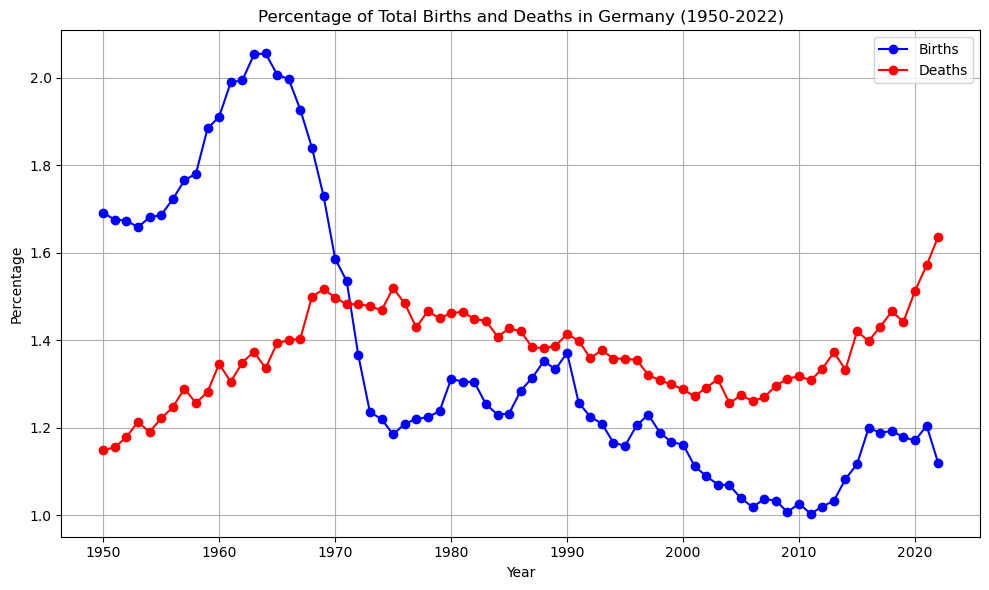

In [72]:
import matplotlib.pyplot as plt

# Calculate total births and deaths for each year
total_births = df_birth['Total'].sum()
total_deaths = df_death['Total'].sum()

# Calculate percentages for births and deaths
birth_percentages = (df_birth['Total'] / total_births) * 100
death_percentages = (df_death['Total'] / total_deaths) * 100

# Plotting the trend of birth and death percentages
plt.figure(figsize=(10, 6))
plt.plot(df_birth['Year'], birth_percentages, marker='o', color='b', linestyle='-', label='Births')
plt.plot(df_death['Year'], death_percentages, marker='o', color='r', linestyle='-', label='Deaths')
plt.title('Percentage of Total Births and Deaths in Germany (1950-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


The chart titled  "Percentage of Total Births and Deaths in Germany (1950-2022)" shows the percentage of total births and deaths in Germany from 1950 to 2022. The y-axis shows the percentage, and the x-axis shows the years.

Here are some observations about the chart:

- The percentage of births and deaths fluctuates over time, but there seems to be a general trend of decline in both.
- Births start at around 1.8% in 1950 and then steadily decline to around 1% by 2022. Deaths start at around 1.2% and increase to over 1.6% by 2022.
- Overall, the death rate is higher than the birth rate throughout the entire period.

This suggests that Germany’s population is <span style="background-color:yellow">aging.</span>

Here are some additional resources that you may find helpful:

Demographics of Germany - Wikipedia: https://en.wikipedia.org/wiki/Demographics_of_Germany

Live births and deaths (time series) - German Federal Statistical Office: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Geburten/Tabellen/lebendgeborene-gestorbene.html


